## Proxy Jump: Ditch Ivanti Pulse Secure VPN client
Normally, we use Ivanti Pulse Secure VPN client to connect to office PC. Newer versions of Pulse Secure implement MFA which I am not a big fan of. Instead, we can use a proxy jump to directly connect to the office PC.

So, we can directly do a proxy jump from the terminal using:
```sh
ssh -J username@hpc-cluster username@office-pc-ip
```
i.e.,
```sh
ssh -J sunbird secret@137.44.1.13
```

where `sunbird` is pre-defined in `~/.ssh/config`. Or we can create an alias in `~/.ssh/config` as follows:
```sh
Host office-pc
    HostName 137.44.1.13
    User secret
    ProxyJump sunbird
```

Now we can easily access the office PC, directly from host PC without Pulse secure. (sorry for the Powerlevel10k theme.)
```sh
╭─    ~                         ✔  5m 27s   base   08:36:56 pm  ─╮
╰─ ssh proxy                                                                 ─╯
Welcome to Ubuntu 20.04.6 LTS (GNU/Linux 5.15.0-76-generic x86_64)

 * Documentation:  https://help.ubuntu.com
 * Management:     https://landscape.canonical.com
 * Support:        https://ubuntu.com/advantage

Expanded Security Maintenance for Applications is enabled.

0 updates can be applied immediately.

Your Hardware Enablement Stack (HWE) is supported until April 2025.
*** Livepatch has fixed kernel vulnerabilities. System restart recommended on the closest maintenance window ***

Last login: Thu Jul 20 20:21:53 2023 from 137.44.29.12
╭─    ~         ✔  base   hell@MSI-X299-SLI-PLUS-7A93  21:05:55  ─╮
```

## Remote VS code to office PC with proxy jump
VS code allows remote connection over proxy jump, so there is nothing to mention here.

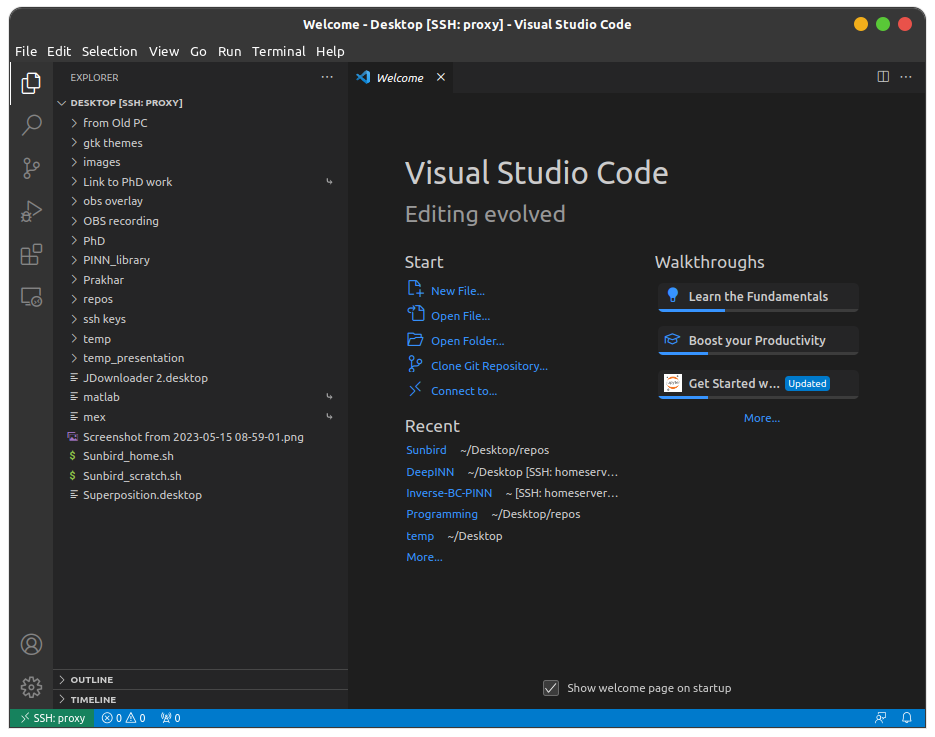


## SSH Tunnel: Connect to No Machine without Pulse Secure
So, we can use something called the "Dynamic Port Forwarding", which creates a socket to local machine, which acts as a SOCKS proxy server. It is as simple as

```sh
ssh -D8080 sunbird
```
This creates a SOCKS proxy server on localhost:8080. We can achieve the same with this in the config file.
```sh
Host    Nomachine
        User    s.1915438
        HostName        sunbird.swansea.ac.uk
        DynamicForward   localhost:8080
```
Now, we just need to mention URL as localhost or 127.0.0.1 and SOCKS proxy server as 8080 in any app, we want pass the network through the uni's network. Just make sure you do `ssh Nomachine` before access the SOCKS server.


In No Machine settings, Click on `Settings` (top right corner), then `Player`, then `Security` tab. Check the "Use a proxy for the network connection" checkbox and click modify. Now, select the "Manual proxy configuration" radio button. In the host put `localhost` and in the port put `8080` and select the "SOCKS proxy" radio button.

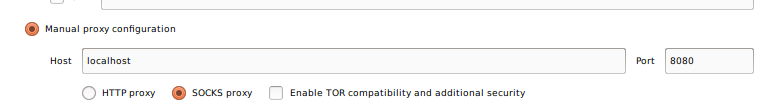

Now simply click back unless you see the "Machines" screen. Simply double click the run the machine, in whichever protocol you've selected. Hopefully, you will see you office desktop.

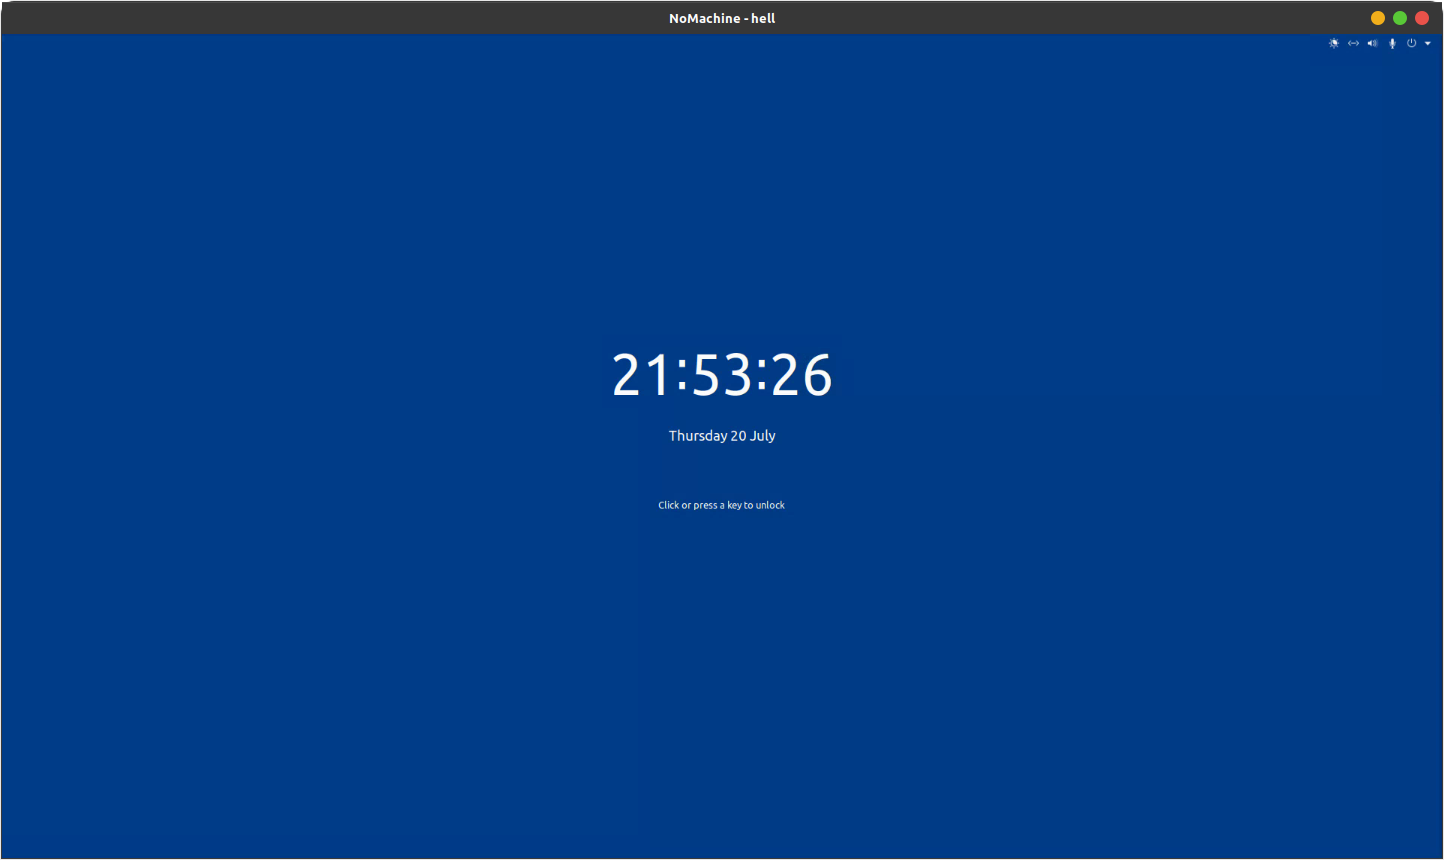



We can also use the SOCKS proxy server in Firefox or Chrome to access paid journal papers etc.